# C2M2: Autograded Assignment

### Outline:
**Here are the objectives of this assignment:**

1. 

**Here are some general tips:**

1. Read the questions carefully to understand what is being asked.
2. When you feel that your work is completed, feel free to hit the ```Validate``` button to see your results on the *visible* unit tests. If you have questions about unit testing, please refer to the "Module 0: Introduction" notebook provided as an optional resource for this course. In this assignment, there are hidden unit tests that check your code. You will not recieve any feedback for failed hidden unit tests until the assignment is submitted. **Do not misinterpret the feedback from visible unit tests as all possible tests for a given question--write your code carefully!**
3. Before submitting, we recommend restarting the kernel and running all the cells in order that they appear to make sure that there are no additional bugs in your code.

In [1]:
# Load required libraries
library(testthat)
library(tidyverse)
library(RCurl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::is_null() masks testthat::is_null()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::matches() masks tidyr::matches(), testthat::matches()


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete




# Problem 1: Post-Hoc Tests

Recently, your local highschool switched their student lunches from circular pizzas to square pizzas. Suprisingly the school reported a change in the overall testing of students in the following weeks. The school decided to test this theory, and has recorded test results following lunches with four different shaped pizzas. It is up to you to determine if the shapes of pizza does in fact improve student's abilities to take tests, and if so, which shaped pizza results in the best test scores.

The school has tested four different shapes, coded as the following:
* a: Circular
* b: Square
* c: Triangular
* d: Cylindrical

In [2]:
# Load the data
df.pizza = read.csv("pizza.csv")
head(df.pizza)
dim(df.pizza)

,X,shape,score
,<int>,<fct>,<dbl>
1,1,a,78.44676
2,2,a,88.75349
3,3,a,80.19209
4,4,a,84.04420
5,5,a,78.50873
6,6,a,82.34018


[1] 992   3

In [3]:
str(df.pizza)

'data.frame':	992 obs. of  3 variables:
 $ X    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ shape: Factor w/ 4 levels "a","b","c","d": 1 1 1 1 1 1 1 1 1 1 ...
 $ score: num  78.4 88.8 80.2 84 78.5 ...


### 1. (a) Intuition and ANOVA

Instead of jumping into direct comparisons, we should check all the pizza shapes resulted in the same scores. Or, in other words, if at least one shape resulted in different test scores than the others.

Using ggplot, create a boxplot of the different shapes. Save your boxplot as `pizza.boxplot`.

Then determine if at least one shape resulted in different test scores than the others. In `pizza.diff`, answer `TRUE` if there is a difference and `FALSE` if there is not a difference.

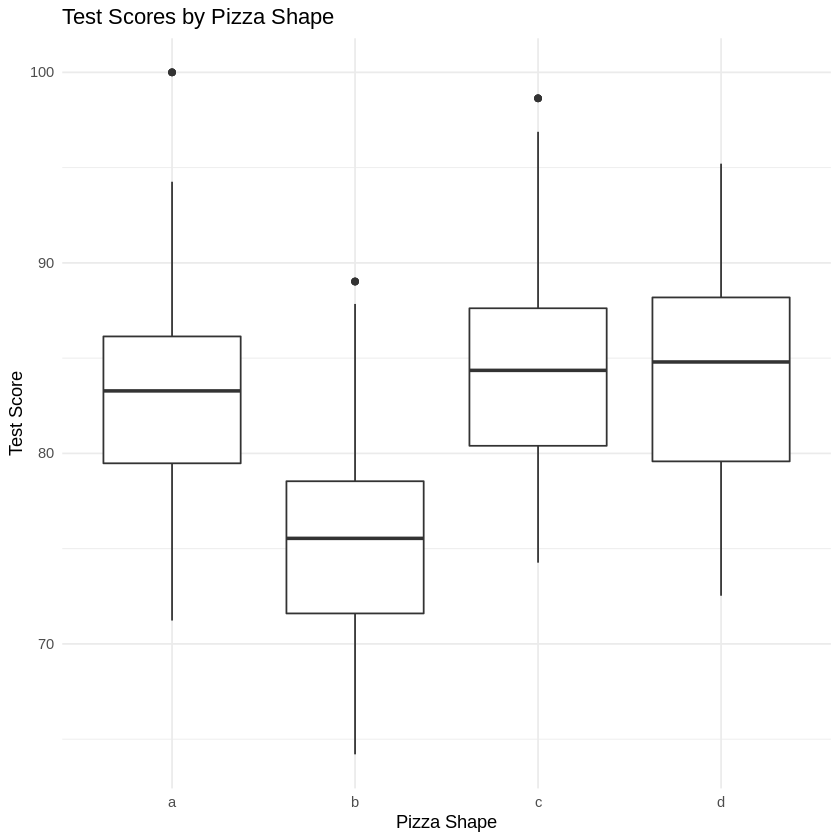

In [4]:
library(ggplot2)

# Create the boxplot with the correct variable names
pizza.boxplot <- ggplot(df.pizza, aes(x = shape, y = score)) +
  geom_boxplot() +
  labs(title = "Test Scores by Pizza Shape", x = "Pizza Shape", y = "Test Score") +
  theme_minimal()

# Display the boxplot
print(pizza.boxplot)


In [5]:
# Perform ANOVA
anova_result <- aov(score ~ shape, data = df.pizza)

# Summary of the ANOVA result
anova_summary <- summary(anova_result)

# Determine if there's a significant difference
pizza.diff <- anova_summary[[1]]["Pr(>F)"][1] < 0.05
pizza.diff


,Pr(>F)
shape,TRUE
Residuals,NA


In [6]:
# library(ggplot2)

# # Create the boxplot
# pizza.boxplot <- ggplot(df.pizza, aes(x = shape, y = score)) +
#   geom_boxplot() +
#   labs(title = "Test Scores by Pizza Shape", x = "Pizza Shape", y = "Test Score") +
#   theme_minimal()

# # Save the boxplot
# print(pizza.boxplot)

# # Perform ANOVA
# anova_result <- aov(score ~ shape, data = df.pizza)

# # Summary of the ANOVA result
# summary(anova_result)


# pizza.diff <- TRUE
# pizza.diff

In [7]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 1. (b) Type I Error Rate

The problem with pairwise tests is that of compounding error. As each test has a probability of getting an incorrect answer, then  the chance of at least one test being incorrect increases as you increase the number of tests. For the following, use a significance of $\alpha = 0.05$.

For our data, calculate the probability that at least one test has type 1 error if we conduct pair-wise comparisons for all combinations of labels? Store your answer in `pizza.error`.

Then determine the probability that at least one test has type 1 error for all possible pairwise tests, using the Bonferroni correction. Store your answer as `bonferroni.error`.

In [8]:
k <- 4
n_comparisons <- choose(k, 2)
n_comparisons


[1] 6

In [9]:
alpha <- 0.05
pizza.error <- 1 - (1 - alpha)^n_comparisons
pizza.error

bonferroni_alpha <- alpha / n_comparisons
bonferroni.error <- 1 - (1 - bonferroni_alpha)^n_comparisons
bonferroni.error




[1] 0.2649081

[1] 0.04896984

In [10]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 1. (c) Tukey's Test

Now let's do our post-hoc tests. Using Tukey's Test, determine which shapes result in the same test scores. Store the pairs of shapes that are the same in a dataframe named `pizza.post.hoc` with the first column named `shape.1` and second column named `shape.2`.

For example, if `a-b` and `a-c` are the only two shapes that result in the same scores, your final dataframe would be created by:

`data.frame(shape.1=c("a", "a"), shape.2=c("b", "c"))`

In [11]:
# Tukey's post-hoc test
tukey_result <- TukeyHSD(anova_result)

# Extract significant pairs
tukey_pairs <- as.data.frame(tukey_result$shape)
tukey_pairs <- tukey_pairs %>%
  rownames_to_column(var = "comparison") %>%
  separate(comparison, into = c("shape.1", "shape.2"), sep = "-")

significant_pairs <- tukey_pairs %>% filter(`p adj` >= 0.05)

# Ensure the result is a dataframe
pizza.post.hoc <- data.frame(shape.1 = significant_pairs$shape.1,
                             shape.2 = significant_pairs$shape.2)

pizza.post.hoc

shape.1,shape.2
<fct>,<fct>
d,a
d,c


In [12]:
# Test Cell

test_that("Check that answer is a dataframe", expect_is(pizza.post.hoc, "data.frame"))
# This cell has hidden test cases that will run after submission.

### 1. (d) Bonferroni's Correction

Repeat the calculations from **1.c**, but include the Bonferroni Correction in your calculations. Report the pairs of shapes in a dataframe named `bonferroni.post.hoc`, of the same specifications as in **1.c**.

In [13]:
# Tukey's post-hoc test
tukey_result <- TukeyHSD(anova_result)

# Extract significant pairs
tukey_pairs <- as.data.frame(tukey_result$shape)
tukey_pairs <- tukey_pairs %>%
  rownames_to_column(var = "comparison") %>%
  separate(comparison, into = c("shape.1", "shape.2"), sep = "-")

# Number of comparisons
n_comparisons <- nrow(tukey_pairs)

# Apply Bonferroni correction: divide the significance level by the number of comparisons
bonferroni_alpha <- 0.05 / n_comparisons

# Filter pairs where the p-value is greater than or equal to the Bonferroni-adjusted alpha
significant_pairs_bonferroni <- tukey_pairs %>%
  filter(`p adj` >= bonferroni_alpha)

# Create the final dataframe
bonferroni.post.hoc <- data.frame(shape.1 = significant_pairs_bonferroni$shape.1,
                                  shape.2 = significant_pairs_bonferroni$shape.2)

# Display the result
bonferroni.post.hoc



shape.1,shape.2
<fct>,<fct>
c,a
d,a
d,c


In [14]:
# Test Cell
# This cell has hidden test cases that will run after submission.

# Problem 2: The Great Gum Debacle (16 Points)

Consider the following experiment: You record data on how long different brands of gum hold their flavor. The brands under consideration are Scepter, Frost, Dubba Bubba, and 8-3 Gum. For each brand, you test $5$ pieces and get the following average number of minutes that they maintained their flavor, respectively: $33, 24, 12, 15$. All of the gums had a variance of $49$ minutes. Somehow.

### 2. (a) Power Overwhelming

Determine the power of this experiment at the $0.05$ significance level. Store you answer as `power.gum`.

In [ ]:
groupmeans = c(33, 24, 12, 15)
power.gum = NA

# your code here


In [ ]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 2. (b) How much gum does it take?

Suppose we haven't performed this experiment yet, and are using theoretical gum statistics to get our values. For the same experiment, if we want a final power of $0.85$, how many piece of each gum would we need to chew? Save your answer as `n.gum`.

In [ ]:
n.gum = NA

# your code here


In [ ]:
# Test Cell
# This cell has hidden test cases that will run after submission.